# Проект Защита персональных данных клиентов
Исполнитель: Троицкий Илья  
Дата: 13 июля 2023  
Проект выполняется в рамках курса Data Science bootcamp, Молуль 3, проект 1

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
def dataframe_info(df):
    display(df.head())
    print('SHAPE:', df.shape)
    df.info()
    print('DUPLICATES:', df.duplicated().sum())
    df.boxplot()
    plt.show()

In [3]:
try:
    data = pd.read_csv('/datasets/insurance.csv')
except:
    data = pd.read_csv('datasets/insurance.csv')    

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


SHAPE: (5000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
DUPLICATES: 153


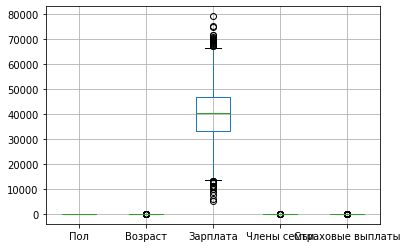

In [4]:
dataframe_info(data)

Вывод:
Данные содержат информацию о страхователях и страховы выплатах, пропусков нет, но есть 153 дублирующих строки. Так как признаков мало и уникальный индетификатор человека отсутствует, то наличей дублей вполне объясняется сущестованием людьей с одинаковыми полом, возврастом, доходом и членами семьи.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество линейной регресси не измениться
**Обоснование:** Пусть P - обратимая матрица, на которую умножаем признаки, тогда параметры модели будут вычислятся по формуле
$$
w1 = ((XP)^T (XP))^{-1} (XP)^T y
$$

Нужно доказать что предсказания после умноженения на обратимую матрицу не изменятся, запишем это условие в виде равенства

$$
X(X^T X)^{-1} X^Ty = XP ((XP)^T (XP))^{-1} (XP)^Ty
$$

$$
X(X^T X)^{-1} X^Ty = XP (XP)^{-1} ((XP)^T)^{-1} P^T X^Ty
$$

$$
X (X^T X)^{-1} X^Ty = X P P^{-1} X^{-1} (P^T X^T)^{-1} P^T X^Ty
$$

$$
X (X^T X)^{-1} X^Ty = X P P^{-1} X^{-1} (X^T)^{-1} (P^T)^{-1} P^T X^Ty
$$

любая матрица умноженная на единичиную равна сама себе, поэтому 

$$
X (X^T X)^{-1} X^Ty = X X^{-1} (X^T)^{-1} X^Ty
$$

$$
X (X^T X)^{-1} X^Ty = X (X^T X)^{-1} X^Ty
$$

ВЫВОД: Мы получили тождественное равенство, а значит и наше первоначальное равенство истинно, т.е. умножение признаков на обратимую матрицу не влияет на качество предсказания. 

$$
X(X^T X)^{-1} X^Ty = XP ((XP)^T (XP))^{-1} (XP)^Ty
$$

$$
X(X^T X)^{-1} X^Ty = XP (P^T X^T X P)^{-1} (XP)^Ty
$$

$$
X(X^T X)^{-1} X^Ty = X P P^{-1} (X^T X)^{-1} (P^T)^{-1} (XP)^Ty
$$

$$
X(X^T X)^{-1} X^Ty = X P P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

$$
X(X^T X)^{-1} X^Ty = X E (X^T X)^{-1} E X^T y
$$

$$
X(X^T X)^{-1} X^Ty = X (X^T X)^{-1} X^T y
$$

$$
𝑤1 = ((XP)^𝑇 XP)^{−1} (XP)^T𝑦
$$
$$
w1 = (P^T X^TX P)^{-1} P^T X^T y
$$
$$
w1 = P^{-1} (X^TX)^{-1} (P^T)^{-1} P^T X^T y
$$
$$
w1 = P^{-1} (X^TX)^{-1} X^T y
$$
$$
w1 = P^{-1} w             
$$

## Алгоритм преобразования

**Алгоритм**

Для преобразования признаков будем умножать их на случайную обратимую матрицу размерности n, где n - количество признаков.

**Обоснование**

По доказанному в п.2 утверждению, умножение признаков на обратимую матрицу не влияет на качество предсказания!

Напишем функцию для преобразвования празнаков

In [5]:
def hide_data(train, test):
    n = train.shape[1]
    deadcount = 0
    p = np.array([])
    
    while (p.size == 0) & (deadcount < 100):
        deadcount += 1
        p = np.random.normal(0,100,(n,n))
        try:
            p1 = np.linalg.inv(p)
        except:
            p = np.array([])
    
    if p.size == 0:
        raise Exception("Не удалось найти обратимую матрицу за 100 попыток, попробуйте завтра")    
    
    return train @ p, test @ p

## Проверка алгоритма

Разделим выборку на обучающие и тестовые данные

In [6]:
features = data.drop(columns='Страховые выплаты', axis=1)
target = data['Страховые выплаты']
features_train, features_test, target_train, target_test = train_test_split(
    features,    target,     random_state=12345,shuffle=True,   test_size=0.25)

Обучим модель на тестовый данных и посчитаем оценку R2 

In [7]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print('Значение метрики R2 для линейной регрессии',r2_score(target_test, predictions))

Значение метрики R2 для линейной регрессии 0.43522757127026546


Теперь преобразуем признаки, и снова обучим модель и посчитаем оценку

In [8]:
features_train_secured, features_test_secured= hide_data(features_train, features_test)

model = LinearRegression()
model.fit(features_train_secured, target_train)
predictions = model.predict(features_test_secured)
print('Значение метрики R2 для линейной регрессии со скрытыми признаками',r2_score(target_test, predictions))

Значение метрики R2 для линейной регрессии со скрытыми признаками 0.43522757127033895


## Вывод
В ходе проекта мы доказали утверждение, что преобразование признаков путем умножения на обратимую матрицу не влияет на качество предсказания. После этого придумали алгоритм преобразования признаков, чтобы скрыть настоящие значения. Проверив две модели, обученные на изначальных признаках и на зашифрованным, мы увидели что оценка R2 этих моделей идентична. Следовательно, **для скрытия данных в будущих проектах, можно применять умножение признаков на обратимую матрицу и это не приведет к потере качества предсказаний.**